<a href="https://colab.research.google.com/github/subalasingh/Machine-Learning-Algorithms/blob/main/KNearestNeighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K Nearest Neighbors

In [1]:
# Importing required libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the Iris dataset
iris = load_iris()
X = iris.data       # Features
y = iris.target     # Labels (0 = setosa, 1 = versicolor, 2 = virginica)

In [3]:
# Splitting the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Hyperparameter Tuning with GridSearchCV
#Set the parameter grid for k values
param_grid = {'n_neighbors': list(range(1, 21))}

In [5]:
# Initialize the KNN model
knn = KNeighborsClassifier()

In [6]:
# Use GridSearchCV for best k
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             scoring='accuracy')

In [7]:
# Best parameters and estimator
best_k = grid_search.best_params_['n_neighbors']
best_knn = grid_search.best_estimator_

print("Best k (n_neighbors):", best_k)

Best k (n_neighbors): 1


In [8]:
# Model already trained during grid search: best_knn
# Predict on test data
y_pred = best_knn.predict(X_test)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



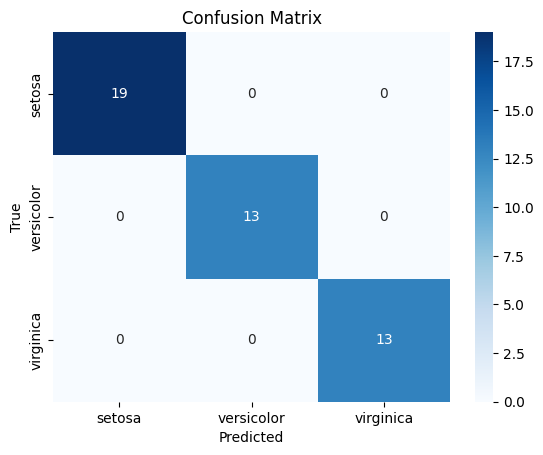

In [9]:
# Evaluate the Model
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()